# Classificação com dados desbalanceados

### Carregamento da base de dados

In [1]:
import pandas as pd
import numpy as np
import random

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('../../dados/credit_data.csv')
print(df.shape)
df.head()

(2000, 5)


,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
df.dropna(inplace=True)

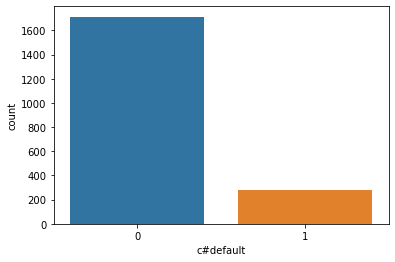

In [4]:
sns.countplot(x = 'c#default', data=df);

In [5]:
X = df.iloc[:, 1:4].values
X.shape

(1997, 3)

In [6]:
y = df.iloc[:, -1].values
y.shape

(1997,)

### Base de treinamento e teste

In [7]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

In [8]:
X_treino.shape, X_teste.shape

((1597, 3), (400, 3))

In [9]:
y_treino.shape, y_teste.shape 

((1597,), (400,))

In [10]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [11]:
1714 / len(df)

0.8582874311467201

In [12]:
283 / len(df)

0.14171256885327993

### Classificação com Naive Bayes

In [13]:
modelo = GaussianNB()

modelo.fit(X_treino, y_treino)

GaussianNB()

In [14]:
previsoes = modelo.predict(X_teste)

In [15]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
accuracy_score(previsoes, y_teste)

0.885

In [17]:
cm = confusion_matrix(previsoes, y_teste)

In [18]:
cm

array([[330,  33],
       [ 13,  24]], dtype=int64)

<AxesSubplot:>

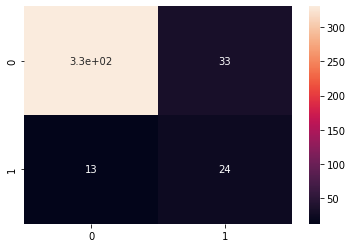

In [19]:
sns.heatmap(cm, annot=True)

In [20]:
(339 + 36) / (339 + 36 + 4 + 21)

0.9375

In [21]:
# Percentual de acerto para pessoas que pagam o empréstimo
339 / (339 + 21)

0.9416666666666667

In [22]:
# Percentual de acerto para pessoas que NÃO pagam o empréstimo
36 / (36 + 4)

0.9

In [23]:
# Perdas: 5.000
# CLientes não pagadores: 1.000
1000 * (18 / 100)

180.0

In [24]:
#Prejuízo 
180 * 5000

900000

### Subamostragem

In [30]:
from imblearn.under_sampling import NearMiss

In [32]:
nm = NearMiss(version=1)
X_under, y_under = nm.fit_sample(X,y)

In [34]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [35]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([283, 283], dtype=int64))

In [36]:
X_treino_u, X_teste_u, y_treino_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

In [38]:
X_treino_u.shape, X_teste_u.shape

((452, 3), (114, 3))

In [39]:
y_treino_u.shape, y_teste_u.shape

((452,), (114,))

In [41]:
model_u = GaussianNB()
model_u.fit(X_treino_u, y_treino_u)
previsoes_u = model_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9736842105263158

In [42]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[55,  1],
       [ 2, 56]], dtype=int64)

In [43]:
55 / 56

0.9821428571428571

In [44]:
56 / 58

0.9655172413793104

In [45]:
1000 * (4 / 100)

40.0

In [46]:
40 * 5000

200000

### Sobreamostragem

In [48]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE()
X_over, y_over = smote.fit_sample(X,y)

In [51]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [53]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [54]:
np.unique(y_over, return_counts=True)

(array([0, 1], dtype=int64), array([1714, 1714], dtype=int64))

In [59]:
X_treino_o, X_teste_o, y_treino_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

In [60]:
X_treino_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [61]:
y_treino_o.shape, y_teste_o.shape

((2742,), (686,))

In [63]:
modelo_o = GaussianNB()
modelo_o.fit(X_treino_o, y_treino_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9052478134110787

In [64]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[292,  14],
       [ 51, 329]], dtype=int64)

In [65]:
329 / (329 + 51)

0.8657894736842106

In [66]:
1000 * 14 / 100

140.0

In [67]:
140 * 5000

700000